In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

station_data = np.load(
    './2025_03_17_19_03_24_LinkGCRN_URBAN_BUS_ROUTE_predictions.npz')

In [78]:
station_data['truth'].shape

(864, 4, 308, 2)

In [79]:
station_data['prediction'].shape

(864, 4, 308, 2)

In [80]:
pre_data = station_data['prediction']
true_data = station_data['truth']

In [81]:
inflow_true_data = true_data[:, 0, :, 0].reshape(-1, 308)
inflow_pre_data = pre_data[:, 0, :, 0].reshape(-1, 308)

In [82]:
# 计算每个站点的 MSE
mse_per_station = np.array([mean_squared_error(
    inflow_true_data[:, i], inflow_pre_data[:, i]) for i in range(308)])

# 计算每个站点的平均流量
mean_flow = np.mean(inflow_true_data, axis=0)

# 归一化 MSE 和 流量
mse_norm = (mse_per_station - mse_per_station.min()) / \
    (mse_per_station.max() - mse_per_station.min())
flow_norm = (mean_flow - mean_flow.min()) / (mean_flow.max() - mean_flow.min())

# 计算综合评分（流量大 + 误差小）
score = flow_norm - mse_norm  # 惩罚误差大的站点

# 选择得分最高的两条线路
best_stations = np.argsort(score)[-2:]
route_num0, route_num1 = best_stations
print(f"选择综合效果最好的两条线路绘制: {route_num0}, {route_num1}")

选择综合效果最好的两条线路绘制: 234, 217


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_65657/2255246892.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


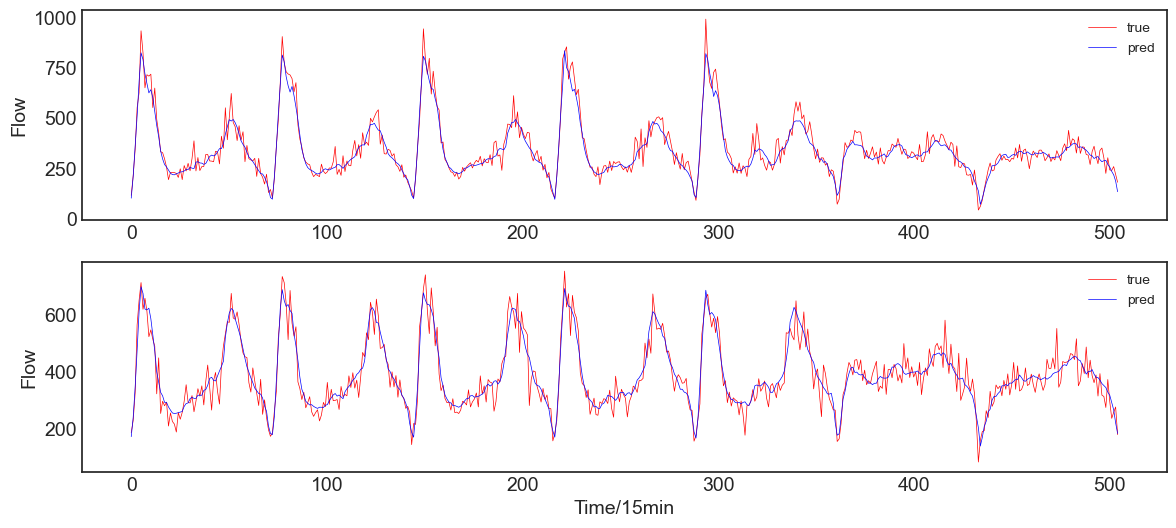

In [83]:

y_true_in = inflow_true_data
y_pre_in = inflow_pre_data

plt.rcParams['font.sans-serif'] = ['Calibri']

y_true_in_week0 = y_true_in[203:707, route_num0]  # a week
y_pre_in_week0 = y_pre_in[203:707, route_num0]

y_true_in_week1 = y_true_in[203:707, route_num1]  # a week
y_pre_in_week1 = y_pre_in[203:707, route_num1]

x1 = np.linspace(0, len(y_true_in_week0), len(y_pre_in_week0))

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

plt.style.use('seaborn-white')

ax[0].plot(x1, y_true_in_week0, color='red', linewidth=0.5, label='true')
ax[0].plot(x1, y_pre_in_week0.astype(int),
           color="blue", linewidth=0.5, label='pred')
ax[0].legend()
ax[0].set_ylabel('Flow', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].plot(x1, y_true_in_week1, color='red', linewidth=0.5, label='true')
ax[1].plot(x1, y_pre_in_week1.astype(int),
           color="blue", linewidth=0.5, label='pred')
ax[1].set_ylabel('Flow', fontsize=14)
ax[1].legend()
ax[1].set_xlabel('Time/15min', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
fig.savefig('./线路预测.svg', bbox_inches='tight')

plt.show()